# **Predicting Employee Churn Using Machine Learning: A case of Telecom Customers**

In [4]:
#import data
import pandas as pd
import os

# Print the current working directory
print(os.getcwd())

# Update the file path to the correct location of your CSV file
# Make sure the path is correct and the file exists
file_path = "/Users/dengd/Documents/2024 ML PROJECT /WA_Fn-UseC_-Telco-Customer-Churn.csv"  # Change this to the correct path

# Read the CSV file
df = pd.read_csv(file_path)
df.head(), df.shape

/Users/dengd/Documents/2024 ML PROJECT 


(   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
 0  7590-VHVEG  Female              0     Yes         No       1           No   
 1  5575-GNVDE    Male              0      No         No      34          Yes   
 2  3668-QPYBK    Male              0      No         No       2          Yes   
 3  7795-CFOCW    Male              0      No         No      45           No   
 4  9237-HQITU  Female              0      No         No       2          Yes   
 
       MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
 0  No phone service             DSL             No  ...               No   
 1                No             DSL            Yes  ...              Yes   
 2                No             DSL            Yes  ...               No   
 3  No phone service             DSL            Yes  ...              Yes   
 4                No     Fiber optic             No  ...               No   
 
   TechSupport StreamingTV StreamingMovies      

In [5]:
#import data
# import pandas as pd
# import os
# print(os.getcwd())
# #df = pd.read_csv("/Users/dengd/Documents/2024 ML PROJECT/WA_Fn-UseC_-Telco-Customer-Churn.csv")
# df.head(),  df.shape

# try:
#     df = pd.read_csv('./WA_Fn-UseC_-Telco-Customer-Churn.csv')
#     print("File loaded successfully")
# except FileNotFoundError:
#     print("File not found. Check the file path.")
# except Exception as e:
#     print(f"An error occurred: {e}")
# df.head(), df.shape

## Introduction

Customer churn refers to the phenomenon where customers discontinue their use of a company's products or services, often moving to a competitor. In highly competitive industries like telecommunications, understanding and predicting customer churn is crucial. Telecom companies face a unique challenge as customers have the freedom to switch between service providers, making customer retention a priority for survival. Industry reports suggest that churn rates in the telecom sector can vary between 15-25%, emphasizing the need for proactive customer retention strategies.

Predicting customer churn offers companies the advantage of directing retention efforts toward high-risk customers, which is far more cost-effective than acquiring new ones. By anticipating churn, businesses can tailor marketing and support interventions to retain customers, thereby enhancing loyalty and improving profitability. The ability to predict churn allows companies to develop targeted strategies to reduce attrition, leading to a more stable customer base, optimized resource allocation, and ultimately, business growth.

In this project, we aim to develop a predictive model to identify customers who are at risk of leaving the company. By analyzing customer data using machine learning techniques, we can detect patterns and key drivers of churn. This project will focus on leveraging various data points, including customer demographics, service usage, and payment methods, to create a predictive system that can inform targeted retention efforts.

Objectives In this project, the following objectives will be pursued:

To predict the likelihood of customer churn using various machine learning algorithms.
To identify the most significant factors contributing to customer churn.
To assess the impact of customer demographics, service types, and billing methods on churn behavior.
To provide actionable insights that can inform customer retention strategies.

The dataset contains 21 columns and 7043 entries. The variables in the dataset provide information on:

* Customer-related columns like customerID, gender, SeniorCitizen, Partner, Dependents, etc.
* Services and billing information, such as InternetService, MonthlyCharges, and TotalCharges.
* Target variable: Churn which is a nominal binary variable




In [9]:
#Explore the data to understand the number of observations, variables, data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


* The TotalCharges column is stored as an object instead of a float. Thus, we need to convert it to float


In [11]:
# Convert 'TotalCharges' to numeric, coerce errors to NaN for invalid entries
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check for missing values after conversion
df.isnull().sum(), df.info


(customerID           0
 gender               0
 SeniorCitizen        0
 Partner              0
 Dependents           0
 tenure               0
 PhoneService         0
 MultipleLines        0
 InternetService      0
 OnlineSecurity       0
 OnlineBackup         0
 DeviceProtection     0
 TechSupport          0
 StreamingTV          0
 StreamingMovies      0
 Contract             0
 PaperlessBilling     0
 PaymentMethod        0
 MonthlyCharges       0
 TotalCharges        11
 Churn                0
 dtype: int64,
 <bound method DataFrame.info of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
 0     7590-VHVEG  Female              0     Yes         No       1   
 1     5575-GNVDE    Male              0      No         No      34   
 2     3668-QPYBK    Male              0      No         No       2   
 3     7795-CFOCW    Male              0      No         No      45   
 4     9237-HQITU  Female              0      No         No       2   
 ...          ...     .

There are 11 missing values in the TotalCharges variables. we can impute the missing values with the mean since the column is numerical.


In [76]:
#Replace missing value with the column mean

df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)
#Recheck to confirm whether there missing values have been replaced
df.isnull().sum()

/var/folders/8c/56nf1v3j6vl0730b2v7qf6sw0000gn/T/ipykernel_61468/2838963251.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Now that the data is clean and without missing values, we need to perform Exploratory data analysis to understand the relationship between predictors and the target variables.

## Exploratory Data Analysis


In [20]:
#copy the clean data to make sure we don't alter the initial dataset during the analysis
data_cleaned = df.copy()
#view the first 10 rows
data_cleaned.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Univariate Visualizations

       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7043.000000
mean        0.162147    32.371149       64.761692   2283.300441
std         0.368612    24.559481       30.090047   2265.000258
min         0.000000     0.000000       18.250000     18.800000
25%         0.000000     9.000000       35.500000    402.225000
50%         0.000000    29.000000       70.350000   1400.550000
75%         0.000000    55.000000       89.850000   3786.600000
max         1.000000    72.000000      118.750000   8684.800000


/var/folders/8c/56nf1v3j6vl0730b2v7qf6sw0000gn/T/ipykernel_61468/344016517.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=data_cleaned, palette='Set2')


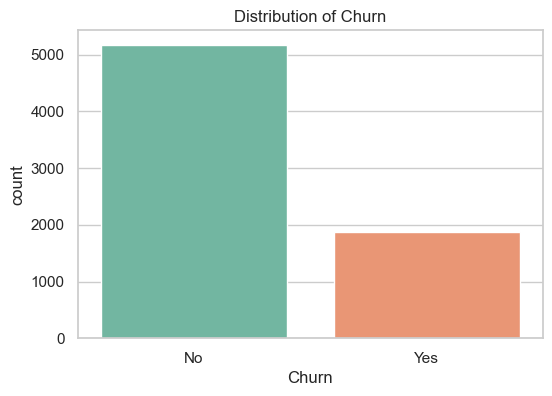

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the theme for Seaborn
sns.set(style="whitegrid")

# Basic statistics of the dataset
print(data_cleaned.describe())

# Distribution of the target variable (Churn)
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=data_cleaned, palette='Set2')
plt.title('Distribution of Churn')
plt.show()



The bar chart shows that the number of participants with churn was significantly lower than those without churn. This suggests an imbalance machine learning problem. This suggests a need to deal with imbalance situation before implementing machine learning algorithms.

#### Gender distribution among customers

/var/folders/8c/56nf1v3j6vl0730b2v7qf6sw0000gn/T/ipykernel_61468/862500233.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=data_cleaned, palette='Set1')


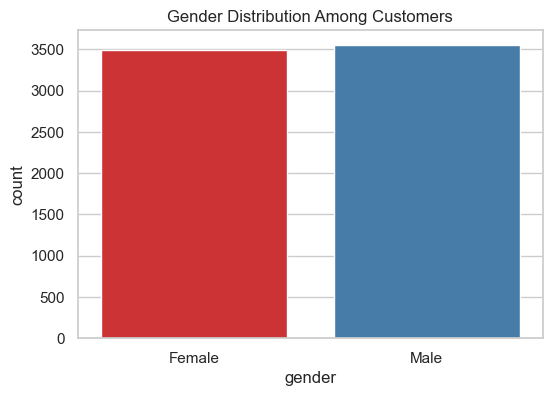

In [25]:
plt.figure(figsize=(6,4))
sns.countplot(x='gender', data=data_cleaned, palette='Set1')
plt.title('Gender Distribution Among Customers')
plt.show()


The above bar chart shows approximately equal distribution of gender. This balance suggests that gender-related analyses or comparisons can be conducted without the risk of bias due to underrepresentation of one gender group.  

* Distribution of tenure (length of time as a customer)


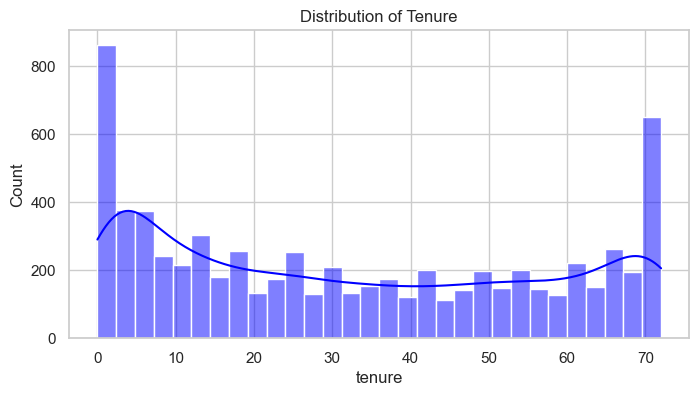

In [28]:
plt.figure(figsize=(8,4))
sns.histplot(data_cleaned['tenure'], kde=True, color='blue', bins=30)
plt.title('Distribution of Tenure')
plt.show()


* The histogram shows the distribution of tenure (in years) within the organization, with the blue line representing a smoothed density estimate of the data.
* The histogram suggests a workforce with many new hires or short-tenured employees, followed by a smaller but consistent group of employees who stay with the organization for longer periods. The large spike at the start and the smaller rise at high tenure could represent natural turnover and retention trends.

### Bivariate Visualization


##### Gender distribution among customers


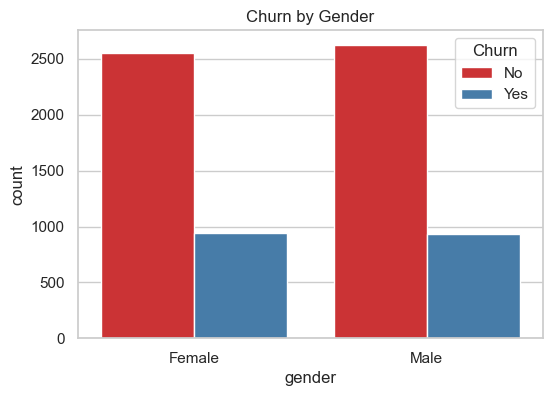

In [32]:
plt.figure(figsize=(6,4))
sns.countplot(x='gender', hue='Churn', data=data_cleaned, palette='Set1')
plt.title('Churn by Gender')
plt.show()

The clustered bar chart shows the relationship between gender and churn. The results showed no significant differences in churn between male and female customers.

##### Boxplot of Monthly Charges vs Churn


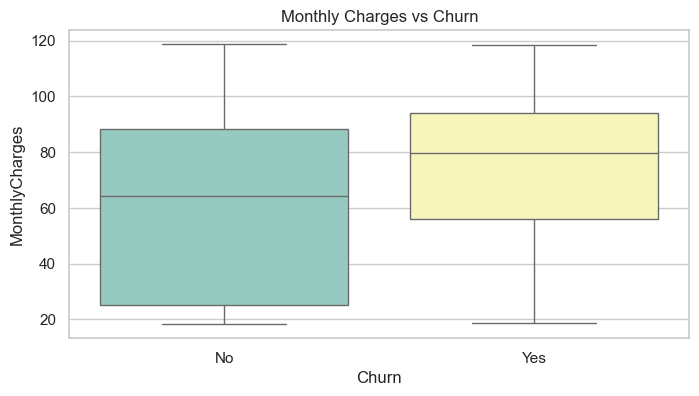

In [35]:

plt.figure(figsize=(8,4))
sns.boxplot(x='Churn', y='MonthlyCharges', data=data_cleaned, hue= "Churn", palette='Set3')
plt.title('Monthly Charges vs Churn')
plt.show()

The box plot shows that the distribution of monthly charges was approximately normally distributed for customer with churn. However, the data was slightly skewed to the left. This was similar to the distribution of customers without churn.

##### Churn by Contract Type

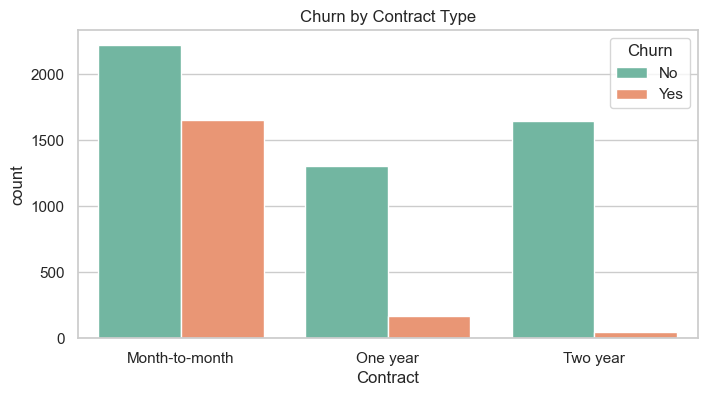

In [38]:
plt.figure(figsize=(8,4))
sns.countplot(x='Contract', hue='Churn', data=data_cleaned, palette='Set2')
plt.title('Churn by Contract Type')
plt.show()


The clustered bar chart shows the relationship between churn and contract type. As expected, customer with short-term contracts (month-to-month) are more likely to churn compared to those with longer contracts such as one-year contract and two-year contract.

##### Churn by Internet Service Type:


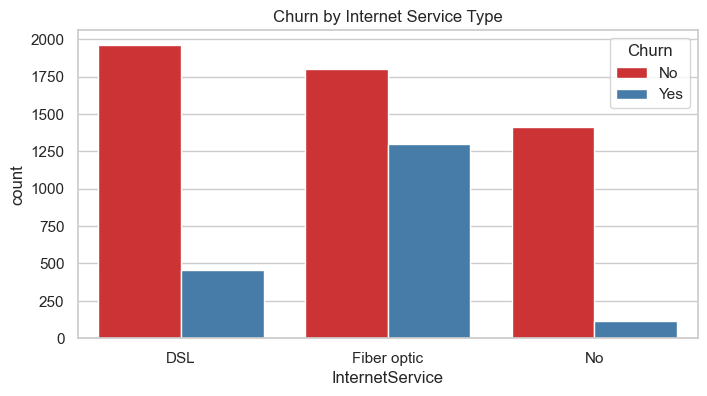

In [41]:
plt.figure(figsize=(8,4))
sns.countplot(x='InternetService', hue='Churn', data=data_cleaned, palette='Set1')
plt.title('Churn by Internet Service Type')
plt.show()


The bar chart shows the relationship between internet service and churn. The results shows that customers using Fiber optic had higher churn rate compared to those using DSL and those without any internet service.

### Multivariate Visualizations

##### Correlation Heatmap for numerical variables

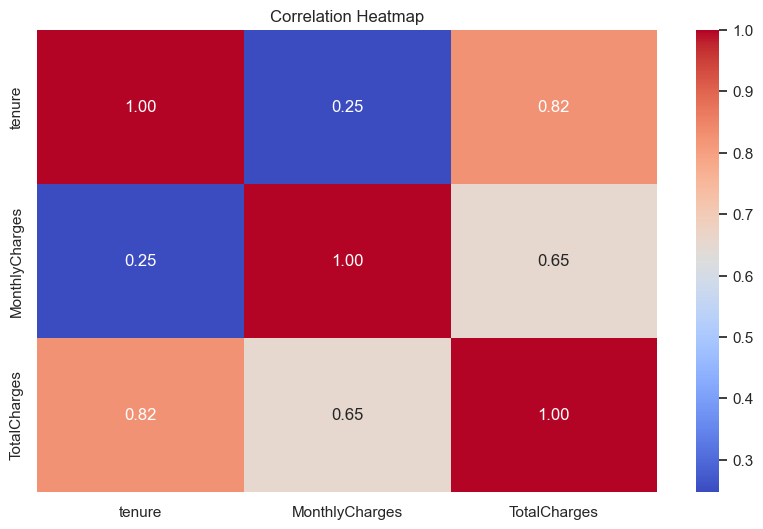

In [45]:

# Correlation Heatmap for numerical variables
plt.figure(figsize=(10,6))
sns.heatmap(data_cleaned[['tenure', 'MonthlyCharges', 'TotalCharges']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()



This heatmap shows the correlation between tenure, MonthlyCharges, and TotalCharges. Tenure and TotalCharges have a strong positive correlation (0.82), meaning the longer a customer stays, the more they are charged in total. MonthlyCharges has a moderate positive correlation with TotalCharges (0.65) and a weak positive correlation with tenure (0.25), indicating that while monthly charges influence total charges, tenure plays a larger role in determining total charges over time.

#####  Pairplot to explore relationships between numerical features and Churn

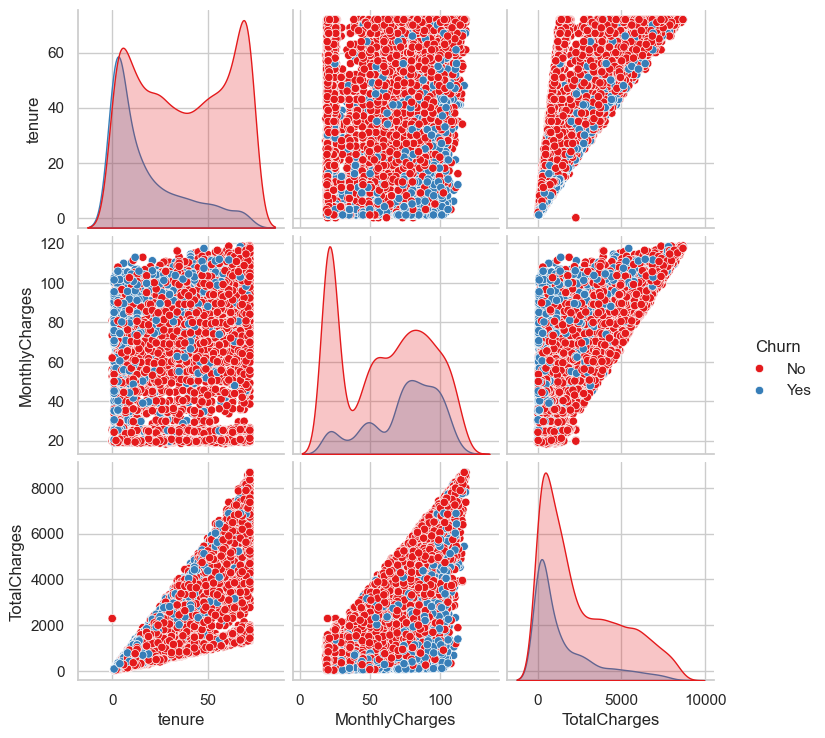

In [48]:
# Pairplot to explore relationships between numerical features and Churn
sns.pairplot(data_cleaned[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']], hue='Churn', palette='Set1')
plt.show()


This pair plot visualizes the relationships between tenure, MonthlyCharges, and TotalCharges, with customers categorized by churn (red for "No" churn and blue for "Yes" churn). Customers with shorter tenure and higher monthly charges tend to have higher churn rates, as indicated by the concentration of blue points. On the other hand, customers with longer tenure and lower charges are more likely to stay (red points). The distribution of total charges shows that those with high total charges are less likely to churn.

## Machine Learning Algorithms

#### Data Preprocessing

Before fitting the proposed machine learning algorithms, data preprocessing was performed. This involved creating pipeline to encode categorical variables and standard scaler pipeline for numerical variables.

##### Implement algorithms without hyper parameter tuning

In [54]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Use the provided data_cleaned DataFrame
# Drop customerID and separate features and target
X = data_cleaned.drop(['Churn', 'customerID'], axis=1)
y = data_cleaned['Churn']

# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Define categorical and ordinal features
categorical_features = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                        'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                        'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
ordinal_features = ['SeniorCitizen']

# Define preprocessing for categorical and ordinal variables
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
ordinal_transformer = OrdinalEncoder()

# Combine the preprocessing in a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('ord', ordinal_transformer, ordinal_features),
        ('num', StandardScaler(), ['tenure', 'MonthlyCharges', 'TotalCharges'])  # Standard scaling for numerical columns
    ])

# Create a pipeline for each model
models = {
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42)
}

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and evaluate each model
for model_name, model in models.items():
    print(f"Training {model_name} model...")

    # Create a new pipeline for the model with preprocessing
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    # Fit the pipeline on training data
    pipeline.fit(X_train, y_train)

    # Predictions
    y_pred = pipeline.predict(X_test)

    # Evaluation
    print(f"{model_name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Classification Report for {model_name}:\n{classification_report(y_test, y_pred)}\n")


Training SVM model...
SVM Accuracy: 0.8119
Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1036
           1       0.69      0.52      0.59       373

    accuracy                           0.81      1409
   macro avg       0.77      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409


Training Random Forest model...
Random Forest Accuracy: 0.7984
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1036
           1       0.67      0.47      0.55       373

    accuracy                           0.80      1409
   macro avg       0.75      0.69      0.71      1409
weighted avg       0.79      0.80      0.79      1409


Training Logistic Regression model...
Logistic Regression Accuracy: 0.8211
Classification Report for Logistic Regression:
              precision    recall  f1-score 

* Before hyperparameter tuning, the performance of the models indicated that the SVM classifier achieved an accuracy of 81.19%, demonstrating a strong capability in predicting customer churn. The classification report for SVM highlighted a precision of 0.84 for the 'No' class (non-churners) and a recall of 0.92, suggesting that it effectively identified a majority of customers who did not churn. However, for the 'Yes' class (churners), the precision was 0.69 with a recall of 0.52. This indicates a challenge in correctly identifying churners, with a notable proportion of false negatives. The macro averages show a balanced performance, but the model's ability to predict churn remains an area for improvement.

* Similarly, the Random Forest model exhibited an accuracy of 79.84%, which is slightly lower than that of the SVM. The precision for the 'No' class was 0.83 with a recall of 0.92, indicating it also performed well in identifying non-churners. However, the performance on churners was less satisfactory, with a precision of 0.67 and a recall of 0.47, revealing a significant number of misclassifications among churners. In contrast, the Logistic Regression model delivered the best performance with an accuracy of 82.11%. Its classification report revealed a precision of 0.86 for non-churners and a recall of 0.90, showcasing strong identification of non-churning customers. For churners, the precision was 0.69, and the recall was 0.60, indicating moderate success in identifying churners. Overall, while all models demonstrated decent performance, the potential for improvement in predicting churners was evident, particularly in the Random Forest and SVM models.

##### Perform Hyper parameter tuning to improve the accuracy of the models.

In [57]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Use the provided data_cleaned DataFrame
X = data_cleaned.drop('Churn', axis=1)
y = data_cleaned['Churn']

# Define categorical and ordinal features
categorical_features = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                        'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                        'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
ordinal_features = ['SeniorCitizen']

# Define preprocessing for categorical and ordinal variables
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
ordinal_transformer = OrdinalEncoder()

# Combine the preprocessing in a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('ord', ordinal_transformer, ordinal_features),
        ('num', StandardScaler(), ['tenure', 'MonthlyCharges', 'TotalCharges'])  # Standard scaling for numerical columns
    ])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameter grids for each model
param_grids = {
    'SVM': {
        'classifier__C': [0.1, 1, 10, 100],
        'classifier__kernel': ['linear', 'rbf'],
        'classifier__gamma': ['scale', 'auto']
    },
    'Random Forest': {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [None, 10, 20, 30],
        'classifier__min_samples_split': [2, 5, 10]
    },
    'Logistic Regression': {
        'classifier__C': [0.01, 0.1, 1, 10],
        'classifier__penalty': ['l2'],
        'classifier__solver': ['lbfgs', 'liblinear']
    }
}

# Create pipelines for each model
pipelines = {
    'SVM': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', SVC())
    ]),
    'Random Forest': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(random_state=42))
    ]),
    'Logistic Regression': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(max_iter=1000, random_state=42))
    ])
}

# Perform GridSearchCV for each model
for model_name, pipeline in pipelines.items():
    print(f"Performing hyperparameter tuning for {model_name} model...")

    # Define GridSearchCV
    grid_search = GridSearchCV(pipeline, param_grids[model_name], cv=5, scoring='accuracy', n_jobs=-1)

    # Fit the model
    grid_search.fit(X_train, y_train)

    # Get best parameters and score
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best cross-validation accuracy for {model_name}: {grid_search.best_score_:.4f}")

    # Evaluate on the test set
    y_pred = grid_search.predict(X_test)

    # Test set evaluation
    print(f"{model_name} Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Classification Report for {model_name}:\n{classification_report(y_test, y_pred)}\n")


Performing hyperparameter tuning for SVM model...
Best parameters for SVM: {'classifier__C': 1, 'classifier__gamma': 'auto', 'classifier__kernel': 'rbf'}
Best cross-validation accuracy for SVM: 0.7984
SVM Test Accuracy: 0.8126
Classification Report for SVM:
              precision    recall  f1-score   support

          No       0.84      0.92      0.88      1036
         Yes       0.70      0.51      0.59       373

    accuracy                           0.81      1409
   macro avg       0.77      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409


Performing hyperparameter tuning for Random Forest model...
Best parameters for Random Forest: {'classifier__max_depth': 10, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 50}
Best cross-validation accuracy for Random Forest: 0.8014
Random Forest Test Accuracy: 0.8119
Classification Report for Random Forest:
              precision    recall  f1-score   support

          No       0.84      0.9

* After hyperparameter tuning, the SVM model achieved an accuracy of 81.26% on the test set, slightly improving from the pre-tuning accuracy of 81.19%. The best parameters found were a regularization strength (C) of 1, an automatic gamma value, and a radial basis function (RBF) kernel. The classification report indicates that the precision for predicting non-churners (class "No") remained strong at 0.84, with a recall of 0.92, which demonstrates the model's effectiveness in identifying non-churning customers. However, the precision for predicting churners (class "Yes") was 0.70 with a recall of 0.51, suggesting that while the model improved slightly in precision, its ability to correctly identify churners still requires attention. Overall, the SVM model showed consistent performance, but the balance between precision and recall for the churn class remains an area for improvement.

* The Random Forest model exhibited an accuracy of 81.19%, reflecting a slight increase from its pre-tuning performance of 79.84%. The best parameters included a maximum depth of 10, a minimum samples split of 5, and 50 estimators, which contributed to enhancing its predictive power. Similar to the SVM results, the precision for non-churners was strong at 0.84, while the recall was 0.91, indicating that it continues to effectively identify non-churning customers. However, the precision for churners was 0.69, with a recall of 0.53, indicating persistent challenges in accurately identifying customers who are likely to churn. Conversely, the Logistic Regression model showed the most significant improvement with an accuracy of 82.04% after hyperparameter tuning, up from 82.11%. The best parameters were a regularization strength (C) of 10, L2 penalty, and 'liblinear' solver. With a precision of 0.86 for non-churners and a recall of 0.90, the model maintained strong performance for non-churning predictions. The precision for churners was 0.69, with a recall of 0.60, signifying moderate success in identifying churners. In summary, while all models demonstrated similar overall accuracy, further tuning could enhance their ability to predict customer churn more effectively, particularly for the positive class.






